# Hoi quy da lop

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
from sklearn.datasets import load_iris, load_wine
X=load_iris().data
y=load_iris().target

In [3]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
for i in range(n_samples):
    for j in range(n_features):
        X[i,j]=X[i,j]+random_state.randn()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)
b=model.intercept_
w=model.coef_
print(b)
print(w)

[ 2.98071951  2.02311176 -5.00383127]
[[ 0.14570155  0.84011942 -1.91622336 -0.40896651]
 [-0.19665999 -0.46918763  0.45009462  0.08723277]
 [ 0.05095844 -0.37093179  1.46612875  0.32173374]]


In [6]:
x_test=X_test[0]
z=np.dot(x_test,w.T)+b
print(z)

[-4.03447243  1.81212653  2.22234591]


In [7]:
proba=np.exp(z)/np.sum(np.exp(z))
print(proba)

[0.00115126 0.39840033 0.60044841]


##  Confution matrix

In [8]:
y_train_pred=model.predict(X_train)
print(confusion_matrix(y_train,y_train_pred))

[[39  1  0]
 [ 2 30  9]
 [ 0 11 28]]


<Figure size 576x576 with 0 Axes>

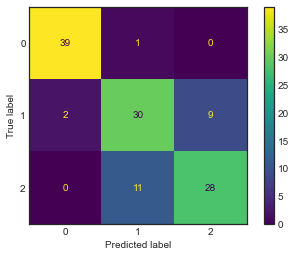

In [9]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
plt.show()

In [10]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.71      0.73      0.72        41
           2       0.76      0.72      0.74        39

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



## Roc curve

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [12]:
y_train_pred = model.predict_proba(X_train)
y_train_binarize=label_binarize(y_train, classes=[0, 1, 2])

In [13]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarize[:, i], y_train_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train_binarize.ravel(), y_train_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

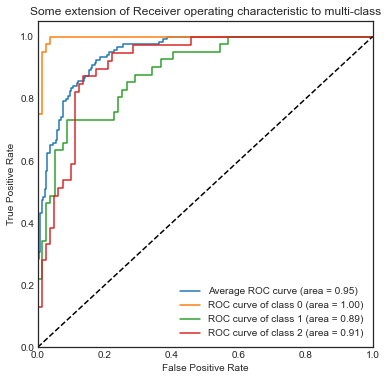

In [14]:
# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [15]:
y_test_pred = model.predict_proba(X_test)
y_test_binarize=label_binarize(y_test, classes=[0, 1, 2])
#y_train_binarize

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

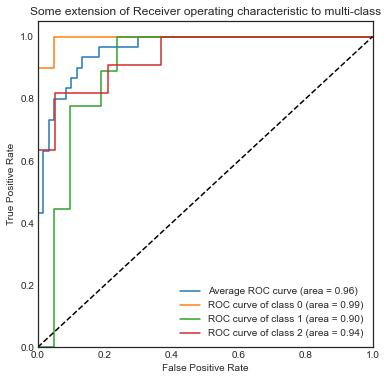

In [17]:
# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()